# Fig. 8: Simulated phosphenes

In [1]:
import numpy as np
import pandas as pd
import pulse2percept as p2p
import argus_shapes as shapes

%matplotlib inline
import matplotlib.pyplot as plt

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2019-04-28 20:09:55,957 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
implant = p2p.implants.ArgusII(h=0, x_center=-1000, rot=np.deg2rad(-45))
sim = p2p.Simulation(implant, engine='joblib')

In [3]:
x_range = (-5000, 3000)
y_range = (-4000, 4000)
loc_od = (15.5, 1.5)
axlambda = 500
xystep = 0.25

In [4]:
sim.set_optic_fiber_layer(sampling=shapes.utils.dva2ret(xystep), n_axons=1000,
                          decay_const=shapes.utils.ret2dva(axlambda), loc_od=loc_od, n_rho=1000, 
                          rho_range=(3, 50), x_range=x_range, y_range=y_range)

In [5]:
dists = [0, 200, 500, 1000]
rhos = [300, 500, 800, 1600]  # fit via AxonMapModel

In [6]:
cs = implant['A7'].current_spread(sim.ofl.gridx, sim.ofl.gridy, layer='OFL', alpha=14000, n=2)
ecs = shapes.imgproc.get_thresholded_image(sim.ofl.current2effectivecurrent(cs), thresh='otsu')
X = pd.DataFrame([{'electrode': 'A7', 'image': ecs}])
y = pd.DataFrame([shapes.imgproc.calc_shape_descriptors(ecs, thresh=None)], index=X.index)
y.drop(columns=['x_center', 'y_center'], inplace=True)

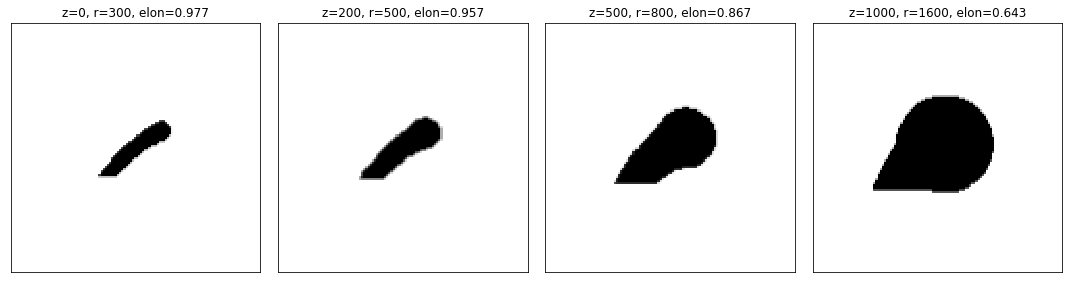

In [7]:
fig, axes = plt.subplots(ncols=len(dists), figsize=(15, 5))
for ax, dist, rho in zip(axes, dists, rhos):
    implant = p2p.implants.ArgusII(h=dist, x_center=-1000, rot=np.deg2rad(-45))
    cs = implant['A7'].current_spread(sim.ofl.gridx, sim.ofl.gridy, layer='OFL', alpha=14000, n=2)
    ecs = shapes.imgproc.get_thresholded_image(sim.ofl.current2effectivecurrent(cs), thresh='otsu')
    ax.imshow(1 - shapes.imgproc.center_phosphene(ecs), cmap='gray')
    desc = shapes.imgproc.calc_shape_descriptors(ecs, thresh=None)
    ax.set_title('z=%d, r=%d, elon=%.3f' % (dist, rho, desc['eccentricity']))
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.savefig('fig8-model-phosphenes.eps')